### DataFrames

DataFrames are two-dimensional Series objects in pandas, essentially. Unlike many other databases and spreadsheets, pandas DataFrames are column-based instead of row-based. In a DataFrame, we can think of each column as a Series. We can achieve data structures similar to pandas DataFrmae in base Python:

In [1]:
df = {
    'index': [0, 1, 2],
    'cols': [
        {
            'name': 'growth',
            'data': [.5, .7, 1.2],
        },
        {
            'name': 'Name',
            'data': ['Paul', 'Geroge', 'Ringo']
        },
    ]
}

df

{'index': [0, 1, 2],
 'cols': [{'name': 'growth', 'data': [0.5, 0.7, 1.2]},
  {'name': 'Name', 'data': ['Paul', 'Geroge', 'Ringo']}]}

We can access rows via the "index", and columns with the column names. Here we can define some functions to do so:

In [2]:
def get_row(df, idx):
    results = []
    value_idx = df['index'].index(idx)
    for col in df['cols']:
        results.append(col['data'][value_idx])
    return results

get_row(df, 1)

[0.7, 'Geroge']

In [3]:
def get_col(df, name):
    for col in df['cols']:
        if col['name'] == name:
            return col['data']

get_col(df, 'Name')

['Paul', 'Geroge', 'Ringo']

In pandas, all the above is build-in and can be readily achieved with the DataFrame data structure.

In [6]:
import pandas as pd

df = pd.DataFrame({
    'growth': [.5, .7, 1.2],
    'Name': ['Paul', 'George', 'Ringo']
})

df

,growth,Name
0,0.5,Paul
1,0.7,George
2,1.2,Ringo


Just like a Series, `.iloc()` and `.loc()` function as expected:

In [7]:
df.iloc[2]

growth      1.2
Name      Ringo
Name: 2, dtype: object

In [9]:
df.iloc[:, 1] # to access columns, we have to also specify we want all rows

0      Paul
1    George
2     Ringo
Name: Name, dtype: object

In [10]:
df.loc[2]

growth      1.2
Name      Ringo
Name: 2, dtype: object

In [11]:
df.loc[:, 'Name']

0      Paul
1    George
2     Ringo
Name: Name, dtype: object

Note that we can also access columns with the `[]` accessor, although this is discouraged due to ambiguity:

In [12]:
df['Name']

0      Paul
1    George
2     Ringo
Name: Name, dtype: object

A column of a DataFrame is actually a Series object, and therefore any methods and operation valid on a Series can be down on a column of a DataFrame:

In [13]:
type(df.loc[:, 'Name'])

pandas.core.series.Series

In [15]:
df.loc[:, 'Name'].str.lower()

0      paul
1    george
2     ringo
Name: Name, dtype: object

Like a Series, you can use the dot accessor to acess columns as attributes as well, with all the same caveats. This will fail if the columns are named the same as one of the reserved words.

In [16]:
df.Name

0      Paul
1    George
2     Ringo
Name: Name, dtype: object

### Constructing a DataFrame

DataFrames can be created in many ways:

* From columns via dictionary of lists
* From rows via list of dictionaries
* From .csv files via `pd.read_csv()`
* From NumPy `ndarray`
* Etc. (SQL, HDF5...)

Let's try to make a DataFrame from rows:

In [17]:
pd.DataFrame([
    {'growth': .5, 'Name': 'Paul'},
    {'growth': .7, 'Name': 'Geroge'},
    {'growth': 1.2, 'Name': 'Ringo'}
])

,growth,Name
0,0.5,Paul
1,0.7,Geroge
2,1.2,Ringo


From a file:

In [20]:
from io import StringIO

csv_file = StringIO(
    '''growth,Name
    .5,Paul
    .7,George
    1.2,Ringo''')

pd.read_csv(csv_file)

,growth,Name
0,0.5,Paul
1,0.7,George
2,1.2,Ringo


From a NumPy array (in this case the column names will need to be specified):

In [21]:
import numpy as np

pd.DataFrame(np.random.randn(10,3),
            columns=['a', 'b', 'c'])

,a,b,c
0,1.191933,0.926145,-0.153270
1,0.350382,1.423402,-1.306816
2,-0.465477,0.175962,-0.021496
3,0.284553,-0.099216,-1.758348
4,-0.172709,-0.450075,-0.690076
5,-0.103144,0.292433,-0.670610
6,2.083198,-1.919844,-0.879781
7,-1.538665,-1.276708,0.420922
8,-0.857284,1.195485,-0.095356
9,-1.418747,-0.545250,-0.494243


### Axes of DataFrames

Because DataFrames are two-dimensional, they have two axes (whereas Series objects only have one). Axis `0` is the row axis, while `1` is the column axis. The axes can be access via the `.axes` attribute:

In [22]:
df.axes

[RangeIndex(start=0, stop=3, step=1),
 Index(['growth', 'Name'], dtype='object')]

In [23]:
df.axes[0] # Rows

RangeIndex(start=0, stop=3, step=1)

In [24]:
df.axes[1] # Columns

Index(['growth', 'Name'], dtype='object')

Many methods that are applied to a DataFrame require us to specify the axis:

In [25]:
df.apply(np.sum, axis=0)

growth                2.4
Name      PaulGeorgeRingo
dtype: object

Now let us deal with a more complex DataFrame:

In [52]:
data = StringIO(
    '''LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
    Big Mountain Pass Aid Station,39.07,7432,11579,43.8%
    Mules Ear Meadow,40.75,7478,12008,45.4%
    Bald Mountain,42.46,7869,12593,47.6%
    Pence Point,43.99,7521,12813,48.4%
    Alexander Ridge Aid Station,46.9,6160,13169,49.8%
    Alexander Springs,47.97,5956,13319,50.3%
    Rogers Trail Junction,49.52,6698,13967,52.8%
    Rogers Saddle,49.77,6790,14073,53.2%
    Railroad Bed,50.15,6520,,
    Lambs Canyon Underpass Aid Station,52.48,6111,14329,54.2%''')
df = pd.read_csv(data)

df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%
2,Bald Mountain,42.46,7869,12593.0,47.6%
3,Pence Point,43.99,7521,12813.0,48.4%
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%
5,Alexander Springs,47.97,5956,13319.0,50.3%
6,Rogers Trail Junction,49.52,6698,13967.0,52.8%
7,Rogers Saddle,49.77,6790,14073.0,53.2%
8,Railroad Bed,50.15,6520,NaN,NaN
9,Lambs Canyon Underpass Aid Station,52.48,6111,14329.0,54.2%


Depending on where you view the DataFrame, it may or may not be in a format that make sense. One way to bruteforce viewability is to use the `.to_string()` method which accepts a `line_width=` parameter:

In [53]:
print(df.to_string(line_width=60))

                                 LOCATION  MILES  \
0           Big Mountain Pass Aid Station  39.07   
1                        Mules Ear Meadow  40.75   
2                           Bald Mountain  42.46   
3                             Pence Point  43.99   
4             Alexander Ridge Aid Station  46.90   
5                       Alexander Springs  47.97   
6                   Rogers Trail Junction  49.52   
7                           Rogers Saddle  49.77   
8                            Railroad Bed  50.15   
9      Lambs Canyon Underpass Aid Station  52.48   

   ELEVATION    CUMUL % CUMUL GAIN  
0       7432  11579.0        43.8%  
1       7478  12008.0        45.4%  
2       7869  12593.0        47.6%  
3       7521  12813.0        48.4%  
4       6160  13169.0        49.8%  
5       5956  13319.0        50.3%  
6       6698  13967.0        52.8%  
7       6790  14073.0        53.2%  
8       6520      NaN          NaN  
9       6111  14329.0        54.2%  


Or, another option is the transpose the DataFrame:

In [54]:
print(df.T.to_string(line_width=60))

                                              0  \
LOCATION          Big Mountain Pass Aid Station   
MILES                                     39.07   
ELEVATION                                  7432   
CUMUL                                     11579   
% CUMUL GAIN                              43.8%   

                                 1                  2  \
LOCATION          Mules Ear Meadow      Bald Mountain   
MILES                        40.75              42.46   
ELEVATION                     7478               7869   
CUMUL                        12008              12593   
% CUMUL GAIN                 45.4%              47.6%   

                            3  \
LOCATION          Pence Point   
MILES                   43.99   
ELEVATION                7521   
CUMUL                   12813   
% CUMUL GAIN            48.4%   

                                            4  \
LOCATION          Alexander Ridge Aid Station   
MILES                                    46.9   
ELEV

### Accessing Data from DataFrames

Just like a Series, we can use `.describe()` to get some immediate feel of the data:

In [55]:
df.describe()

,MILES,ELEVATION,CUMUL
count,10.000000,10.000000,9.000000
mean,46.306000,6853.500000,13094.444444
std,4.493574,681.391428,942.511686
min,39.070000,5956.000000,11579.000000
25%,42.842500,6250.000000,12593.000000
50%,47.435000,6744.000000,13169.000000
75%,49.707500,7466.500000,13967.000000
max,52.480000,7869.000000,14329.000000


Remember that basically each column of a DataFrame is a Series, so we can treat them as such:

In [56]:
df.loc[:, 'LOCATION'].value_counts()

    Bald Mountain                         1
    Rogers Trail Junction                 1
    Mules Ear Meadow                      1
    Alexander Ridge Aid Station           1
    Big Mountain Pass Aid Station         1
    Alexander Springs                     1
    Pence Point                           1
    Railroad Bed                          1
    Rogers Saddle                         1
    Lambs Canyon Underpass Aid Station    1
Name: LOCATION, dtype: int64

The `.corr()` method is extra useful now; by default to gives us the *Pearson Correlation Coefficient* statistic for all the numerical columns in a DataFrame. The statistic is between -1 and 1, and describes the linear relationship between the variables:

In [57]:
df.corr()

,MILES,ELEVATION,CUMUL
MILES,1.000000,-0.783780,0.986613
ELEVATION,-0.783780,1.000000,-0.674333
CUMUL,0.986613,-0.674333,1.000000


### Plotting DataFrames

Like Series objects, DataFrame also have the same plotting methods build-in that runs matplotlib underneath. The default behavior uses the index as the x values, and plot everynumerical columns:

<Figure size 432x288 with 0 Axes>

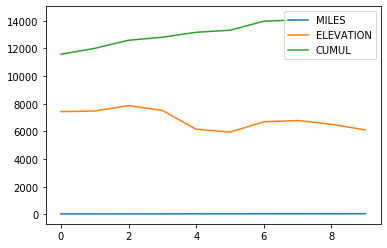

In [58]:
import matplotlib.pyplot as plt

fig = plt.figure()
df.plot()

Alternatively, we can make sure that each of the columns are plotted onto the same axis of the graph using subplots and referring to the `ax=` parameter:

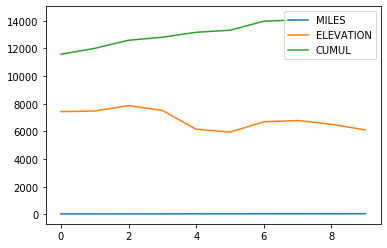

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(ax=ax)

Because pandas runs matplotlib underneath the code, we can easily manipulate the plot to achieve better visualizations. For example:

Text(0, 0.5, 'Distance (miles)')

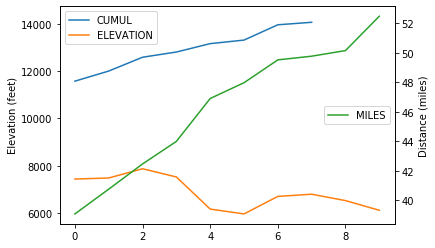

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.loc[:, ['CUMUL', 'ELEVATION']].plot(ax=ax)
df.loc[:, 'MILES'].plot(secondary_y=True) # plot this column on a different y axis for visibility
plt.legend(loc='right') # This will display the legend of the MILS plot in a different place
ax.set_ylabel('Elevation (feet)')
ax.right_ax.set_ylabel('Distance (miles)')

Note that because pandas plots uses the index of a DataFrame as the default x-values, the current x-axis isn't very informative. We can remedy this by specifying the x-axis values:

Text(0, 0.5, 'Elevation (feet)')

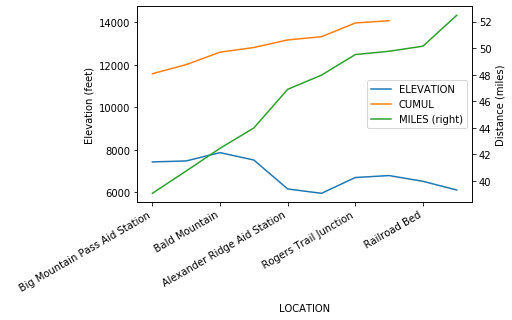

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(x='LOCATION', y=['ELEVATION', 'CUMUL'], ax=ax)
df.plot(x='LOCATION', y='MILES', secondary_y=True, ax=ax)
ax.set_ylabel('Elevation (feet)')
ax.right_ax.set_ylabel('Distance (miles)')
fig.autofmt_xdate() # Rotate x-axis labels for visibility
ax.set_ylabel('Elevation (feet)')

Or, we can plot elevation against the miles:

Text(0, 0.5, 'Elevation (feet)')

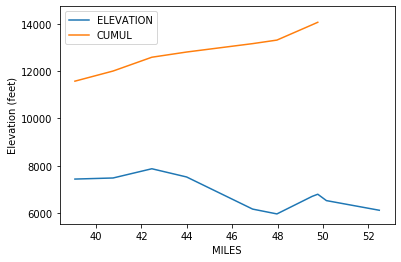

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(x='MILES', y=['ELEVATION', 'CUMUL'], ax=ax)
plt.legend(loc='best')
ax.set_ylabel('Elevation (feet)')

### Adding rows to a DataFrame

There are a couple ways to add rows of data to a DataFrame. The `concat()` function combines two DataFrames:

In [64]:
df2 = pd.DataFrame([('Lambs Trail', 54.14, 6628, 14805, '56.0%')],
                  columns=['LOCATION', 'MILES', 'ELEVATION', 'CUMUL', '% CUMUL GAIN'])

df2

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
0,Lambs Trail,54.14,6628,14805,56.0%


In [65]:
pd.concat([df, df2]) # Note that as is usual with pandas methods, this will not modify the original data.

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%
2,Bald Mountain,42.46,7869,12593.0,47.6%
3,Pence Point,43.99,7521,12813.0,48.4%
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%
5,Alexander Springs,47.97,5956,13319.0,50.3%
6,Rogers Trail Junction,49.52,6698,13967.0,52.8%
7,Rogers Saddle,49.77,6790,14073.0,53.2%
8,Railroad Bed,50.15,6520,NaN,NaN
9,Lambs Canyon Underpass Aid Station,52.48,6111,14329.0,54.2%


Note the quirk with the combined index. The `concat()` function will preserve the original index values unless we tell it not to:

In [66]:
df = pd.concat([df, df2], ignore_index=True)

df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%
2,Bald Mountain,42.46,7869,12593.0,47.6%
3,Pence Point,43.99,7521,12813.0,48.4%
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%
5,Alexander Springs,47.97,5956,13319.0,50.3%
6,Rogers Trail Junction,49.52,6698,13967.0,52.8%
7,Rogers Saddle,49.77,6790,14073.0,53.2%
8,Railroad Bed,50.15,6520,NaN,NaN
9,Lambs Canyon Underpass Aid Station,52.48,6111,14329.0,54.2%


Note that `append()` is a function that's a specifc case of `.concat()`; `append()` assumes you are adding rows, and the joining is an "outer" join.

To add a column, this is similar to base Python dictionaries; you can simily assign a Series to a new column name (using `.loc()` whenever possible):

In [76]:
df.loc[:, 'bogus'] = pd.Series(range(11)) 

df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,STATION,bogus
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%,True,0
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%,False,1
2,Bald Mountain,42.46,7869,12593.0,47.6%,False,2
3,Pence Point,43.99,7521,12813.0,48.4%,False,3
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%,True,4
5,Alexander Springs,47.97,5956,13319.0,50.3%,False,5
6,Rogers Trail Junction,49.52,6698,13967.0,52.8%,False,6
7,Rogers Saddle,49.77,6790,14073.0,53.2%,False,7
8,Railroad Bed,50.15,6520,NaN,NaN,False,8
9,Lambs Canyon Underpass Aid Station,52.48,6111,14329.0,54.2%,True,9


We can do something even more complex. For example, let's add a column called "STATION", which will indicate whether or not the location has an aid station. We can determine this by the occurrence of "Station" in the "LOCATION" column:

In [69]:
def aid_station(val):
    return 'Station' in val

df.loc[:, 'STATION'] = df['LOCATION'].apply(aid_station)

df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,bogus,STATION
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%,0,True
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%,1,False
2,Bald Mountain,42.46,7869,12593.0,47.6%,2,False
3,Pence Point,43.99,7521,12813.0,48.4%,3,False
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%,4,True
5,Alexander Springs,47.97,5956,13319.0,50.3%,5,False
6,Rogers Trail Junction,49.52,6698,13967.0,52.8%,6,False
7,Rogers Saddle,49.77,6790,14073.0,53.2%,7,False
8,Railroad Bed,50.15,6520,NaN,NaN,8,False
9,Lambs Canyon Underpass Aid Station,52.48,6111,14329.0,54.2%,9,True


### Deleting Rows

We can use the method `.drop()` to delete rows. Note that this will not work in place unless you tell pandas to do so; by default it will return a new DataFrame:

In [70]:
df.drop([5, 9]) # .drop() deletes row via index

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,bogus,STATION
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%,0,True
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%,1,False
2,Bald Mountain,42.46,7869,12593.0,47.6%,2,False
3,Pence Point,43.99,7521,12813.0,48.4%,3,False
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%,4,True
6,Rogers Trail Junction,49.52,6698,13967.0,52.8%,6,False
7,Rogers Saddle,49.77,6790,14073.0,53.2%,7,False
8,Railroad Bed,50.15,6520,NaN,NaN,8,False
10,Lambs Trail,54.14,6628,14805.0,56.0%,10,False


In [72]:
df.drop(df.index[5:10:4]) # Using the .index attribute gives us even more flexibility

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,bogus,STATION
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%,0,True
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%,1,False
2,Bald Mountain,42.46,7869,12593.0,47.6%,2,False
3,Pence Point,43.99,7521,12813.0,48.4%,3,False
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%,4,True
6,Rogers Trail Junction,49.52,6698,13967.0,52.8%,6,False
7,Rogers Saddle,49.77,6790,14073.0,53.2%,7,False
8,Railroad Bed,50.15,6520,NaN,NaN,8,False
10,Lambs Trail,54.14,6628,14805.0,56.0%,10,False


### Deleting Columns

There are several options here. The `.pop()` method is one, or we can use `.drop()` again but speficy `axis=1`, or the `del` statement. Generally we should avoid using the `.pop()` method or the `del` statement in this manner as this modifies the original DataFrame, ulike `.drop(axis=1)`, which returns a new DataFrame.

In [77]:
bogus = df.pop('bogus') # the .pop() method here is very similar to the base Python methods for lists

bogus

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
Name: bogus, dtype: int64

In [79]:
df # .pop() works in place and is irreversible

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,STATION
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%,True
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%,False
2,Bald Mountain,42.46,7869,12593.0,47.6%,False
3,Pence Point,43.99,7521,12813.0,48.4%,False
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%,True
5,Alexander Springs,47.97,5956,13319.0,50.3%,False
6,Rogers Trail Junction,49.52,6698,13967.0,52.8%,False
7,Rogers Saddle,49.77,6790,14073.0,53.2%,False
8,Railroad Bed,50.15,6520,NaN,NaN,False
9,Lambs Canyon Underpass Aid Station,52.48,6111,14329.0,54.2%,True


In [81]:
df.loc[:, 'bogus'] = bogus

df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,STATION,bogus
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%,True,0
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%,False,1
2,Bald Mountain,42.46,7869,12593.0,47.6%,False,2
3,Pence Point,43.99,7521,12813.0,48.4%,False,3
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%,True,4
5,Alexander Springs,47.97,5956,13319.0,50.3%,False,5
6,Rogers Trail Junction,49.52,6698,13967.0,52.8%,False,6
7,Rogers Saddle,49.77,6790,14073.0,53.2%,False,7
8,Railroad Bed,50.15,6520,NaN,NaN,False,8
9,Lambs Canyon Underpass Aid Station,52.48,6111,14329.0,54.2%,True,9


In [83]:
del df['bogus'] # The del statement works as expected, in this case do not use .loc[], but use the [] accessor

df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,STATION
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%,True
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%,False
2,Bald Mountain,42.46,7869,12593.0,47.6%,False
3,Pence Point,43.99,7521,12813.0,48.4%,False
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%,True
5,Alexander Springs,47.97,5956,13319.0,50.3%,False
6,Rogers Trail Junction,49.52,6698,13967.0,52.8%,False
7,Rogers Saddle,49.77,6790,14073.0,53.2%,False
8,Railroad Bed,50.15,6520,NaN,NaN,False
9,Lambs Canyon Underpass Aid Station,52.48,6111,14329.0,54.2%,True
